In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, value_counts
from utils import add_title, add_logo, add_subtext

<IPython.core.display.Javascript object>

## Configure matplotlib

To install PT Sans:

```
sudo apt install fonts-paratype
fc-cache -fv
fc-list | grep "PT Sans"
rm ~/.cache/matplotlib/fontlist-v390.json 
```

Restart Python/Jupyter and run the following:


In [3]:
import matplotlib.font_manager as fm

# Get list of available fonts
available_fonts = set(f.name for f in fm.fontManager.ttflist)

# Check for specific fonts
print("PT Sans is available:", "PT Sans" in available_fonts)
print("Skolar Sans is available:", "Skolar Sans" in available_fonts)

PT Sans is available: True
Skolar Sans is available: False


<IPython.core.display.Javascript object>

In [4]:
# Make the figures smaller to save some screen real estate.
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = [6.75, 3.5]

# AIBM brand colors
aibm_light_gray = "#F3F4F3"
aibm_medium_gray = "#767676"
aibm_green = "#0B8569"
light_green = "#AAC9B8"
aibm_orange = "#C55300"
light_orange = "#F4A26B"
aibm_purple = "#9657A5"
light_purple = "#CFBCD0"
aibm_blue = "#4575D6"
light_blue = "#C9D3E8"

# additional colors from coolers.co
dark_gray = "#404040"
dark_purple = "#28112B"
dark_green = "#002500"
amber = "#F5BB00"
oxford_blue = "#000022"
bittersweet = "#FF6666"
crimson = "#D62839"

rainbow = [crimson, aibm_orange, amber, aibm_green, aibm_blue, aibm_purple]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=rainbow)

plt.rcParams["axes.edgecolor"] = aibm_medium_gray  # Spines (axis border)
plt.rcParams["xtick.color"] = aibm_medium_gray  # X-axis ticks
plt.rcParams["ytick.color"] = aibm_medium_gray  # Y-axis ticks
plt.rcParams["axes.labelcolor"] = aibm_medium_gray  # Axis labels

# remove all spines
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

# light gray horizontal grid lines
plt.rcParams["grid.color"] = aibm_light_gray
plt.rcParams["grid.linestyle"] = "-"  # Solid lines
plt.rcParams["grid.linewidth"] = 1  # Thin lines
plt.rcParams["axes.grid"] = True  # Enable grid
plt.rcParams["axes.grid.axis"] = "y"  # Apply only to horizontal lines

# Remove tick marks
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["xtick.minor.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams["ytick.minor.size"] = 0

# Use PT Sans as the default font
plt.rcParams["font.family"] = "PT Sans"

<IPython.core.display.Javascript object>

## Female Data

In [5]:
df = pd.read_hdf("FemMarriageData.hdf", "FemMarriageData")
df.shape

(75769, 49)

<IPython.core.display.Javascript object>

In [6]:
df.columns

Index(['ftfmode', 'evrmarry', 'hyst', 'tubs', 'rwant', 'ager', 'rmarital',
       'hieduc', 'nchildhh', 'parity', 'agebaby1', 'fmarno', 'mardat01',
       'marend01', 'mardis01', 'strloper', 'intent', 'addexp', 'finalwgt',
       'cmintvw', 'anycoll', 'divorced', 'separated', 'widowed', 'stillma',
       'cmbirth', 'cmmarrhx', 'cmdivorcx', 'cycle', 'agemarry', 'missing',
       'year', 'age_index', 'agemarry_index', 'birth_index', 'caseid',
       'mar1diss', 'timesmar', 'cmstphsbx', 'marstat', 'strlopev', 'ageint',
       'currentcm', 'firstcm', 'wantkid2', 'educat', 'want_yes', 'mar2p',
       'fmarital'],
      dtype='object')

<IPython.core.display.Javascript object>

In [7]:
df.groupby("cycle")["finalwgt"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,67886.793450,62766.997833,6022.000000,16643.000000,37818.000000,104203.000000,6.588880e+05
4,8450.0,685207.105089,419209.971920,19741.000000,326658.000000,709094.500000,888281.000000,5.499660e+06
5,10847.0,5549.977323,2668.618457,349.876100,3648.050800,5534.631900,6642.457950,3.354982e+04
6,7643.0,8054.522410,7342.734883,118.656790,4175.880599,6553.169964,9590.027246,2.618800e+05
7,12279.0,5029.297260,5527.506822,41.084436,1577.777464,3040.704205,6087.405502,3.022635e+04
8,5601.0,10870.802178,12606.086581,1714.541000,4143.177321,6744.820880,12344.571351,8.520795e+04
9,5699.0,10789.922092,11292.680457,1859.105000,4382.507056,7124.422412,12611.500388,7.539941e+04
10,5554.0,13002.896291,15811.370555,1924.916000,4641.329178,7513.585309,14818.169985,1.067744e+05
11,6141.0,11833.891223,13074.819563,1340.862000,4246.620623,7464.253280,13868.904073,8.333213e+04


<IPython.core.display.Javascript object>

In [8]:
pd.crosstab(df["parity"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
parity,,,,,,,,,,
0.0,3356,3122,3936,3230,5596,2460,2632,2404,2826,2833
1.0,1448,1559,2072,1519,2214,1043,1040,1011,1039,931
2.0,1605,2109,2654,1603,2360,1100,1057,1159,1201,1009
3.0,895,1040,1418,828,1313,640,621,626,670,488
4.0,373,364,518,309,496,232,228,243,262,202
5.0,154,162,156,95,181,86,82,67,79,65
6.0,83,58,51,29,74,23,22,25,44,31
7.0,29,23,21,15,26,12,11,13,10,12
8.0,17,10,15,8,8,3,4,3,6,5


<IPython.core.display.Javascript object>

In [9]:
trimmed = df["parity"] > 12
df.loc[trimmed, "parity"] = np.nan

<IPython.core.display.Javascript object>

In [10]:
pd.crosstab(df["addexp"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
addexp,,,,,,,,,,
0.0,3566,4529,5791,3739,5524,2494,2550,2865,3229,3634
0.5,63,75,132,27,46,21,23,23,23,20
1.0,1393,1311,1694,1443,2342,1131,1168,1003,1069,656
1.5,197,222,376,26,56,22,21,18,35,17
2.0,1579,1452,1649,1585,2732,1257,1313,1060,1149,869
2.5,229,183,300,7,15,5,8,4,6,3
3.0,534,425,538,516,1030,443,421,381,446,286
3.5,78,39,104,2,7,2,0,0,1,0
4.0,221,151,168,207,367,161,137,136,134,76


<IPython.core.display.Javascript object>

In [11]:
trimmed = df["addexp"] > 12
df.loc[trimmed, "addexp"] = np.nan

<IPython.core.display.Javascript object>

In [12]:
pd.crosstab(df["age_index"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
age_index,,,,,,,,,,
14.0,0,3,14,0,0,0,0,0,0,0
15.0,269,204,243,202,418,170,176,166,166,132
16.0,300,233,290,231,424,205,186,196,197,124
17.0,370,269,280,232,445,207,240,178,219,142
18.0,480,258,289,238,488,224,211,210,192,170
19.0,469,253,293,238,494,229,191,174,196,162
20.0,342,267,283,256,412,182,159,101,131,127
21.0,282,231,285,271,412,200,178,136,138,113
22.0,280,282,297,281,431,176,193,157,170,124


<IPython.core.display.Javascript object>

In [13]:
age_min = 14
age_max = 55
age_step = 3
age_bins = np.arange(age_min, age_max, age_step)

df["age_group"] = np.digitize(df["ager"], age_bins) * age_step
df["age_group"] += age_min - 2
df.loc[df["ager"].isnull(), "age_index"] = np.nan

<IPython.core.display.Javascript object>

In [14]:
from utils import round_into_bins

df["age_group"] = round_into_bins(df["ager"], 3, low=14) + 1

<IPython.core.display.Javascript object>

In [15]:
pd.crosstab(df["age_group"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
age_group,,,,,,,,,,
15.0,569,440,547,433,842,375,362,362,363,256
18.0,1319,780,862,708,1427,660,642,562,607,474
21.0,904,780,865,808,1255,558,530,394,439,364
24.0,864,841,963,816,1293,599,661,542,574,389
27.0,923,945,1011,775,1445,635,611,554,605,473
30.0,882,1022,1223,827,1395,657,621,547,626,587
33.0,766,1018,1340,790,1120,555,611,520,628,624
36.0,601,914,1292,799,1090,505,562,475,537,559
39.0,528,783,1243,724,1064,450,448,408,458,547


<IPython.core.display.Javascript object>

In [16]:
pd.crosstab(df["birth_index"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
birth_index,,,,,,,,,,
30,325,0,0,0,0,0,0,0,0,0
40,1970,1638,0,0,0,0,0,0,0,0
50,2922,3235,3918,556,0,0,0,0,0,0
60,2752,2795,3898,2508,2199,332,74,331,64,0
70,0,782,2959,2690,4017,1635,1617,1307,1431,796
80,0,0,72,1889,4499,2076,2101,1726,1908,1769
90,0,0,0,0,1564,1558,1892,1697,1841,1772
100,0,0,0,0,0,0,15,493,897,1249


<IPython.core.display.Javascript object>

In [17]:
value_counts(df["intent"])

,counts
values,
1.0,34416
2.0,39110
3.0,2047
4.0,196


<IPython.core.display.Javascript object>

In [18]:
df["intent_yes"] = np.where(df["intent"].isna(), np.nan, df["intent"] == 1)
df["want_yes"] = np.where(df["rwant"].isna(), np.nan, df["rwant"] == 1)
df["child_yes"] = np.where(df["parity"].isna(), np.nan, df["parity"] > 0)

<IPython.core.display.Javascript object>

In [19]:
# R is surgically sterile at interview due to tubal sterilization
# R is surgically sterile at interview due to hysterectomy
# Type of sterilization operation in effect is "other female operation"

df["strl_tubs"] = df["tubs"] == 1
df["strl_yes"] = (df["tubs"] == 1) | (df["hyst"] == 1) | (df["strloper"] == 4)
value_counts(df["strl_yes"])

,counts
values,
False,68254
True,7515


<IPython.core.display.Javascript object>

In [20]:
(df["tubs"] == 1).mean() / df["strl_yes"].mean()

0.8495009980039921

<IPython.core.display.Javascript object>

### Do responses depend on mode?

In [21]:
df["ftfmode"].value_counts(normalize=True)

ftfmode
2.0    0.749373
1.0    0.250627
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [22]:
df.groupby("ftfmode")["want_yes"].mean()

ftfmode
1.0    0.483696
2.0    0.448076
Name: want_yes, dtype: float64

<IPython.core.display.Javascript object>

In [23]:
df.groupby(["birth_index", "ftfmode"])["want_yes"].mean()

birth_index  ftfmode
70           1.0        0.171123
             2.0        0.123746
80           1.0        0.321739
             2.0        0.307356
90           1.0        0.561905
             2.0        0.611929
100          1.0        0.726190
             2.0        0.650173
Name: want_yes, dtype: float64

<IPython.core.display.Javascript object>

In [24]:
df.groupby("ftfmode")["intent_yes"].mean()

ftfmode
1.0    0.363571
2.0    0.329431
Name: intent_yes, dtype: float64

<IPython.core.display.Javascript object>

In [25]:
df.groupby(["birth_index", "ftfmode"])["intent_yes"].mean()

birth_index  ftfmode
70           1.0        0.046875
             2.0        0.029801
80           1.0        0.191489
             2.0        0.170854
90           1.0        0.419565
             2.0        0.477896
100          1.0        0.631720
             2.0        0.565564
Name: intent_yes, dtype: float64

<IPython.core.display.Javascript object>

In [26]:
df.groupby("ftfmode")["parity"].mean()

ftfmode
1.0    1.230714
2.0    1.011228
Name: parity, dtype: float64

<IPython.core.display.Javascript object>

In [27]:
df.groupby(["birth_index", "ftfmode"])["parity"].mean()

birth_index  ftfmode
70           1.0        1.968750
             2.0        1.552980
80           1.0        1.792553
             2.0        1.535535
90           1.0        1.297826
             2.0        0.824695
100          1.0        0.198925
             2.0        0.084379
Name: parity, dtype: float64

<IPython.core.display.Javascript object>

### Resampling

In [28]:
from utils import resample_by_cycle

sample = resample_by_cycle(df)

<IPython.core.display.Javascript object>

In [29]:
sample.groupby(["birth_index", "ftfmode"])["want_yes"].mean()

birth_index  ftfmode
70           1.0        0.235556
             2.0        0.116460
80           1.0        0.274752
             2.0        0.272158
90           1.0        0.551813
             2.0        0.598305
100          1.0        0.809524
             2.0        0.650672
Name: want_yes, dtype: float64

<IPython.core.display.Javascript object>

In [30]:
def make_table(df, var, drop_cols=[30, 40]):
    table = df.groupby(["age_group", "birth_index"])[var].mean().unstack()
    table.drop(columns=drop_cols, errors="ignore", inplace=True)
    table.columns = [f"{1900+cohort}s" for cohort in table.columns]
    return table

<IPython.core.display.Javascript object>

In [31]:
from utils import set_palette


def plot_table(table):
    """ """
    rows, cols = table.shape
    # set_palette("nipy_spectral", cols, reverse=True)
    table.plot(ax=plt.gca())

<IPython.core.display.Javascript object>

### Simple example to test functions

In [32]:
table = make_table(sample, "want_yes") * 100
cohorts = table.columns
ages = table.index

<IPython.core.display.Javascript object>

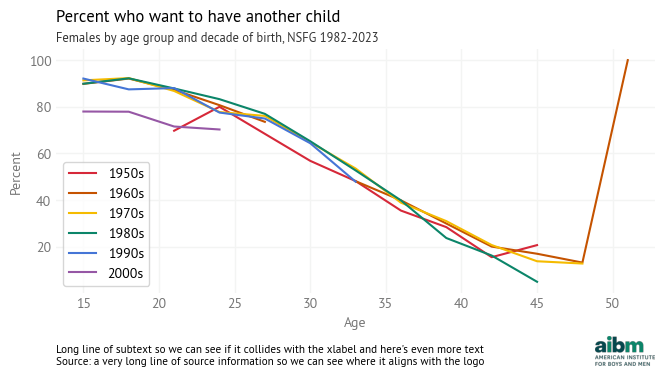

<IPython.core.display.Javascript object>

In [33]:
plot_table(table)
title = "Percent who want to have another child"
subtitle = "Females by age group and decade of birth, NSFG 1982-2023 "
add_title(title, subtitle)

subtext = """
Long line of subtext so we can see if it collides with the xlabel and here's even more text
Source: a very long line of source information so we can see where it aligns with the logo"""
add_subtext(subtext)

decorate(xlabel="Age", ylabel="Percent")
add_logo()
None

In [34]:
from utils import percentile_rows


def plot_table_with_errors(tables, cohorts, ages):
    table = tables[0]
    rows, cols = table.shape
    # set_palette("nipy_spectral", len(cohorts), reverse=True)

    for cohort in cohorts:
        frame = pd.DataFrame(columns=ages)
        for i, table in enumerate(tables):
            frame.loc[i] = table[cohort]

        # using the 84% CI, so non-overlapping corresponds to
        # a difference that's significant at 5% level
        low, median, high = percentile_rows(frame, [8, 50, 92])
        plt.fill_between(ages, low, high, alpha=0.15)
        plt.plot(ages, median, label=cohort, alpha=0.6)

<IPython.core.display.Javascript object>

In [35]:
from marriage import underride


def add_question_text(text, **options):
    underride(
        options, ha="left", va="bottom", color="0.2", fontname="PT Sans", fontsize=9
    )
    ax = plt.gca()
    ax.text(0.04, 0.05, text, transform=ax.transAxes, **options)

<IPython.core.display.Javascript object>

In [36]:
def summarize_age_groups(df, var, age_groups):
    columns = np.sort(df["birth_index"].unique())
    res = pd.DataFrame(dtype=float, columns=columns)

    for i in range(101):
        sample = resample_by_cycle(df).query("age_group in @age_groups")
        row = sample.groupby("birth_index")[var].mean() * 100
        res.loc[i] = row

    return res.mean(axis=0)

<IPython.core.display.Javascript object>

In [37]:
def summarize_age_group(tables, age_group):
    df = pd.DataFrame(dtype=float, columns=tables[0].columns)

    for i, table in enumerate(tables):
        df.loc[i] = table.loc[age_group]

    return df.mean()

<IPython.core.display.Javascript object>

In [38]:
def savefig(fig_number, extra_artist):
    filename = f"nsfg_intent{fig_number:02d}"
    plt.savefig(
        filename, dpi=150, bbox_inches="tight", bbox_extra_artists=[extra_artist]
    )

<IPython.core.display.Javascript object>

### Intend to have another child

Looking to the future, do you intend to have a/another baby at some time?

In [39]:
tables = [make_table(resample_by_cycle(df), "intent_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

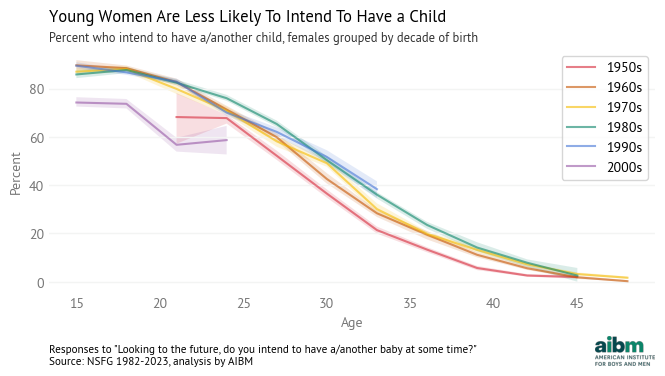

<IPython.core.display.Javascript object>

In [40]:
plot_table_with_errors(tables, cohorts, ages)
title = "Young Women Are Less Likely To Intend To Have a Child"
subtitle = (
    "Percent who intend to have a/another child, females grouped by decade of birth"
)
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you intend to have a/another baby at some time?"
Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Age", ylabel="Percent")
inset = add_logo()
savefig(3, inset)

In [41]:
age_groups = [15, 18, 21, 24]
summarize_age_groups(df, "intent_yes", age_groups).dropna()

50     67.760714
60     82.394746
70     80.840035
80     81.875348
90     82.223206
100    69.162837
dtype: float64

<IPython.core.display.Javascript object>

### Percent who want to have another child

Looking to the future, do you, yourself, _want_ to have a/another baby at
some time?

In [42]:
tables = [make_table(resample_by_cycle(df), "want_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

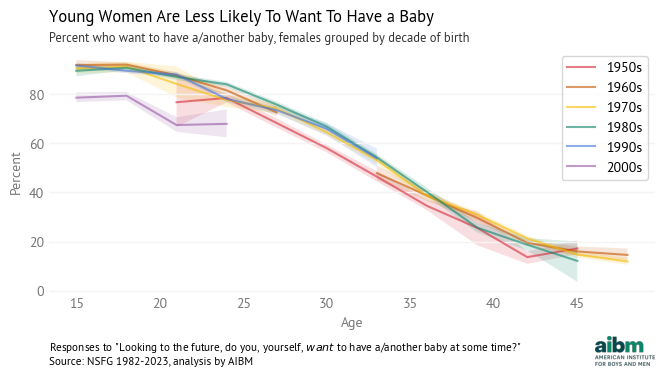

<IPython.core.display.Javascript object>

In [43]:
plot_table_with_errors(tables, cohorts, ages)
title = "Young Women Are Less Likely To Want To Have a Baby"
subtitle = "Percent who want to have a/another baby, females grouped by decade of birth"
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you, yourself, $want$ to have a/another baby at some time?"
Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Age", ylabel="Percent")
inset = add_logo()
savefig(2, inset)

In [44]:
summarize_age_group(tables, 24)

1950s    78.449871
1960s    81.318098
1970s    77.302836
1980s    83.994451
1990s    77.943712
2000s    67.993814
dtype: float64

<IPython.core.display.Javascript object>

In [45]:
summarize_age_group(tables, 24)

1950s    78.449871
1960s    81.318098
1970s    77.302836
1980s    83.994451
1990s    77.943712
2000s    67.993814
dtype: float64

<IPython.core.display.Javascript object>

"Among women aged 15 to 24 in this birth cohort, 76% say they want to become mothers, markedly lower than the 87% for women born in the 1980s and 1990s"

In [46]:
age_groups = [15, 18, 21, 24]
summarize_age_groups(df, "want_yes", age_groups).dropna()

50     78.576079
60     88.316983
70     84.560873
80     87.130592
90     86.747357
100    75.690227
dtype: float64

<IPython.core.display.Javascript object>

### Number of live births

parity is a recoded variable, so there's no single question it corresponds to

In [47]:
tables = [make_table(resample_by_cycle(df), "parity") for i in range(101)]

<IPython.core.display.Javascript object>

In [48]:
summary = summarize_age_group(tables, 24)
summary.round(1)

1950s    0.8
1960s    0.8
1970s    0.8
1980s    0.7
1990s    0.6
2000s    0.3
dtype: float64

<IPython.core.display.Javascript object>

In [49]:
summary = summarize_age_group(tables, 33)
summary.round(1)

1950s    1.7
1960s    1.7
1970s    1.8
1980s    1.7
1990s    1.4
2000s    NaN
dtype: float64

<IPython.core.display.Javascript object>

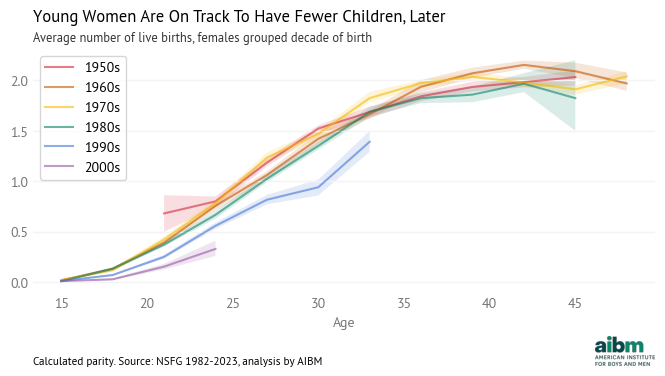

<IPython.core.display.Javascript object>

In [50]:
plot_table_with_errors(tables, cohorts, ages)
title = "Young Women Are On Track To Have Fewer Children, Later"
subtitle = "Average number of live births, females grouped decade of birth"
add_title(title, subtitle)

subtext = """
Calculated parity. Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Age")
inset = add_logo()
savefig(1, inset)

### Percent who have born at least one child

`child_yes` is based on `parity`, which is a recode, so there's not a single question

In [51]:
tables = [make_table(resample_by_cycle(df), "child_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

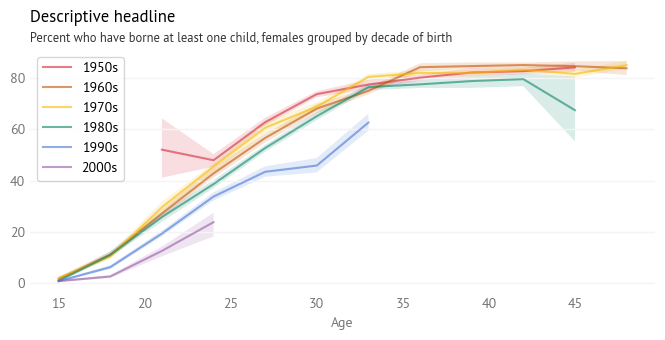

<IPython.core.display.Javascript object>

In [52]:
plot_table_with_errors(tables, cohorts, ages)
title = "Descriptive headline"
subtitle = (
    "Percent who have borne at least one child, females grouped by decade of birth"
)
add_title(title, subtitle)

# subtext: Question, NSFG 1982-2023 "

decorate(xlabel="Age")

### Expected additional births

`addexp` is a recoded "sentral number of additional births expected", based on a series of questions including "smallest" and "largest" number of babies

In [53]:
tables = [make_table(resample_by_cycle(df), "addexp") for i in range(101)]

<IPython.core.display.Javascript object>

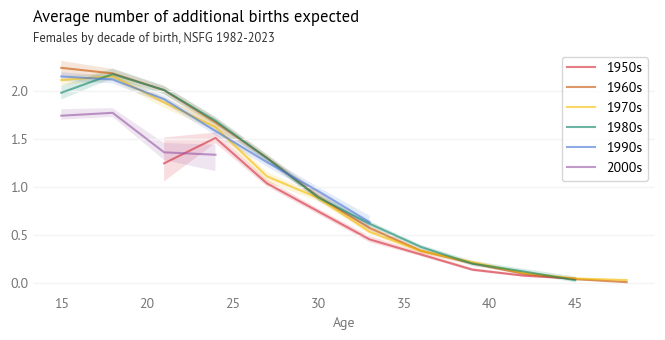

<IPython.core.display.Javascript object>

In [54]:
plot_table_with_errors(tables, cohorts, ages)
title = "Average number of additional births expected"
subtitle = "Females by decade of birth, NSFG 1982-2023 "
add_title(title, subtitle)

decorate(xlabel="Age")

### Sterilizing operations

`strl_yes` includes tubal ligation, hysterectory, and "other operation"

`strl_tubs` is only tubal ligation

In [55]:
df.groupby("cycle")["strl_yes"].mean()

cycle
3     0.004267
4     0.005444
5     0.000000
6     0.172053
7     0.151478
8     0.150509
9     0.141604
10    0.169968
11    0.165120
12    0.116720
Name: strl_yes, dtype: float64

<IPython.core.display.Javascript object>

In [56]:
recent = df.query("cycle >=6")

<IPython.core.display.Javascript object>

In [57]:
tables = [make_table(resample_by_cycle(recent), "strl_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

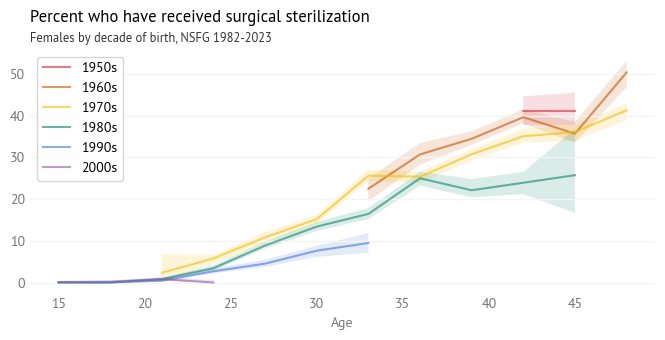

<IPython.core.display.Javascript object>

In [58]:
plot_table_with_errors(tables, cohorts, ages)
title = "Percent who have received surgical sterilization"
subtitle = "Females by decade of birth, NSFG 1982-2023 "
add_title(title, subtitle)

decorate(xlabel="Age")

## Male data

In [59]:
df2 = pd.read_hdf("MaleMarriageData.hdf", "MaleMarriageData")
df2.shape

(38769, 43)

<IPython.core.display.Javascript object>

In [60]:
df2.columns

Index(['caseid', 'cmbirth', 'timesmar', 'fmarit', 'evrmarry', 'everoper',
       'evrchil', 'evrchiln', 'marrend4', 'cmdivw', 'rwant', 'hieduc',
       'rmarital', 'mardat01', 'intent', 'addexp', 'finalwgt', 'cmintvw',
       'numbiokid', 'anycoll', 'marend01', 'cmmarrhx', 'divorced', 'separated',
       'widowed', 'stillma', 'cycle', 'agemarry', 'ager', 'missing', 'year',
       'age_index', 'agemarry_index', 'birth_index', 'fmarno', 'mar1diss',
       'ftfmode', 'evbiokid', 'complete', 'complete_var', 'ongoing_var',
       'complete_missing', 'ongoing_missing'],
      dtype='object')

<IPython.core.display.Javascript object>

In [61]:
df2.groupby("cycle")["finalwgt"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
6,4928.0,12408.080664,13181.166931,494.853354,5100.934063,8129.115216,14649.566185,109064.168136
7,10403.0,5972.083308,7083.639572,38.700643,1775.486118,3484.639531,6980.739663,49735.071265
8,4815.0,12569.040291,13684.093019,1714.541000,4929.431343,8043.044705,14400.088306,85207.950000
9,4506.0,13572.387483,13109.264361,1859.105000,5668.692539,9279.889173,16067.881985,75399.410000
10,4540.0,15774.723348,17587.946794,1924.916000,5837.014310,9448.798531,18646.521019,106774.400000
11,5206.0,13872.816942,14750.387052,1340.862000,5050.599720,9048.322876,16133.803136,83332.130000
12,4371.0,17318.738586,14048.895074,1514.718391,7233.842329,12743.859416,22706.306280,95539.720755


<IPython.core.display.Javascript object>

In [62]:
pd.crosstab(df2["addexp"], df2["cycle"])

cycle,6,7,8,9,10,11,12
addexp,,,,,,,
0.0,1701,3515,1666,1590,1859,2134,2305
0.5,15,28,9,18,8,4,8
1.0,819,1832,806,812,750,893,562
1.5,30,47,15,28,20,30,22
2.0,1610,3334,1559,1410,1281,1488,1016
2.5,9,27,11,5,9,10,5
3.0,559,1138,525,457,403,460,295
3.5,1,4,5,4,2,4,1
4.0,115,311,151,126,134,111,100


<IPython.core.display.Javascript object>

In [63]:
trimmed = df2["addexp"] > 12
df2.loc[trimmed, "addexp"] = np.nan

<IPython.core.display.Javascript object>

In [64]:
pd.crosstab(df2["age_index"], df2["cycle"])

cycle,6,7,8,9,10,11,12
age_index,,,,,,,
15.0,194,456,168,179,166,186,112
16.0,235,464,236,207,177,186,152
17.0,192,473,236,233,174,223,129
18.0,271,513,216,198,198,230,162
19.0,224,454,226,177,171,207,144
20.0,191,351,141,164,119,117,76
21.0,182,360,161,119,153,131,83
22.0,190,343,183,155,103,139,91
23.0,170,346,171,149,135,133,111


<IPython.core.display.Javascript object>

In [65]:
from utils import round_into_bins

df2["age_group"] = round_into_bins(df2["ager"], 3, low=14) + 1

<IPython.core.display.Javascript object>

In [66]:
pd.crosstab(df2["age_group"], df2["cycle"])

cycle,6,7,8,9,10,11,12
age_group,,,,,,,
15.0,429,920,404,386,343,372,264
18.0,687,1440,678,608,543,660,435
21.0,563,1054,485,438,375,387,250
24.0,496,1061,504,452,410,419,315
27.0,444,1077,536,472,403,484,395
30.0,415,1006,448,474,430,470,397
33.0,449,895,467,430,387,524,473
36.0,442,923,362,405,358,432,449
39.0,442,883,380,318,337,405,430


<IPython.core.display.Javascript object>

In [67]:
pd.crosstab(df2["birth_index"], df2["cycle"])

cycle,6,7,8,9,10,11,12
birth_index,,,,,,,
50,322,0,0,0,0,0,0
60,1459,1857,292,60,302,101,0
70,1527,3133,1344,1211,1067,1194,629
80,1620,3710,1669,1536,1326,1560,1420
90,0,1703,1510,1680,1471,1492,1293
100,0,0,0,19,374,859,1029


<IPython.core.display.Javascript object>

In [68]:
value_counts(df2["intent"])

,counts
values,
1.0,23218
2.0,15192
3.0,346
4.0,13


<IPython.core.display.Javascript object>

In [69]:
df2["intent_yes"] = np.where(df2["intent"].isna(), np.nan, df2["intent"] == 1)
df2["want_yes"] = np.where(df2["rwant"].isna(), np.nan, df2["rwant"] == 1)
df2["child_yes"] = np.where(df2["numbiokid"].isna(), np.nan, df2["numbiokid"] > 0)

<IPython.core.display.Javascript object>

In [70]:
# Have you ever had a vasectomy or any other operation that makes it
# impossible for you to father a child?
df2["strl_yes"] = np.where(df2["everoper"].isna(), np.nan, df2["everoper"] == 1)

### Do the responses depend on mode?

In [71]:
df2["ftfmode"].value_counts(normalize=True)

ftfmode
2.0    0.729581
1.0    0.270419
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [72]:
df2.groupby("ftfmode")["want_yes"].mean()

ftfmode
1.0    0.619705
2.0    0.542594
Name: want_yes, dtype: float64

<IPython.core.display.Javascript object>

In [73]:
df2.groupby(["birth_index", "ftfmode"])["want_yes"].mean()

birth_index  ftfmode
70           1.0        0.254777
             2.0        0.179039
80           1.0        0.475570
             2.0        0.390449
90           1.0        0.722222
             2.0        0.712619
100          1.0        0.841772
             2.0        0.791728
Name: want_yes, dtype: float64

<IPython.core.display.Javascript object>

In [74]:
df2.groupby("ftfmode")["intent_yes"].mean()

ftfmode
1.0    0.504230
2.0    0.433365
Name: intent_yes, dtype: float64

<IPython.core.display.Javascript object>

In [75]:
df2.groupby(["birth_index", "ftfmode"])["intent_yes"].mean()

birth_index  ftfmode
70           1.0        0.175758
             2.0        0.094828
80           1.0        0.323353
             2.0        0.259669
90           1.0        0.588235
             2.0        0.594963
100          1.0        0.755102
             2.0        0.712828
Name: intent_yes, dtype: float64

<IPython.core.display.Javascript object>

In [76]:
df2.groupby("ftfmode")["numbiokid"].mean()

ftfmode
1.0    0.734124
2.0    0.659134
Name: numbiokid, dtype: float64

<IPython.core.display.Javascript object>

In [77]:
df2.groupby(["birth_index", "ftfmode"])["numbiokid"].mean()

birth_index  ftfmode
70           1.0        1.472727
             2.0        1.300866
80           1.0        1.276276
             2.0        1.048848
90           1.0        0.529412
             2.0        0.369360
100          1.0        0.055394
             2.0        0.013120
Name: numbiokid, dtype: float64

<IPython.core.display.Javascript object>

In [78]:
from utils import resample_by_cycle

sample = resample_by_cycle(df2)

<IPython.core.display.Javascript object>

In [79]:
table = make_table(sample, "want_yes") * 100
cohorts = table.columns
ages = table.index

<IPython.core.display.Javascript object>

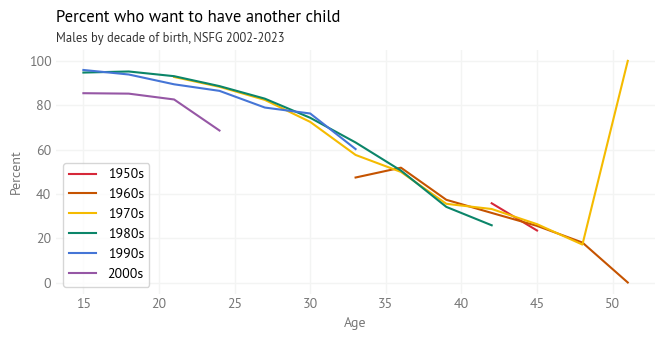

<IPython.core.display.Javascript object>

In [80]:
plot_table(table)
title = "Percent who want to have another child"
subtitle = "Males by decade of birth, NSFG 2002-2023 "
add_title(title, subtitle)

decorate(xlabel="Age", ylabel="Percent")

### Want

`rwant`

Looking to the future, do you, yourself, want to have another child at some time?

In [81]:
tables = [make_table(resample_by_cycle(df2), "want_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

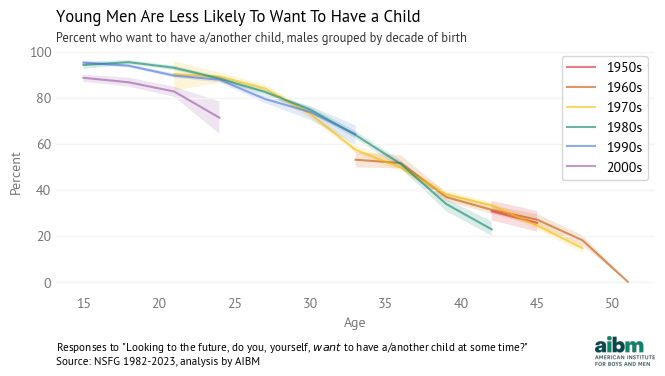

<IPython.core.display.Javascript object>

In [82]:
plot_table_with_errors(tables, cohorts, ages)
title = "Young Men Are Less Likely To Want To Have a Child"
subtitle = "Percent who want to have a/another child, males grouped by decade of birth"
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you, yourself, $want$ to have a/another child at some time?"
Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Age", ylabel="Percent")
inset = add_logo()
savefig(5, inset)

In [83]:
summarize_age_group(tables, 24)

1950s          NaN
1960s          NaN
1970s    89.010368
1980s    88.297265
1990s    87.890132
2000s    71.687011
dtype: float64

<IPython.core.display.Javascript object>

"Among the young men (15 to 24) born in the 2000s, for example, 86% say they want children, compared to the 76% among their female peers. "

In [84]:
age_groups = [15, 18, 21, 24]
summarize_age_groups(df2, "want_yes", age_groups).dropna()

70     89.095065
80     91.842061
90     91.733720
100    85.771150
dtype: float64

<IPython.core.display.Javascript object>

### Intend

`intent`

Looking to the future, do you intend to have another child at some time?

In [85]:
tables = [make_table(resample_by_cycle(df2), "intent_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

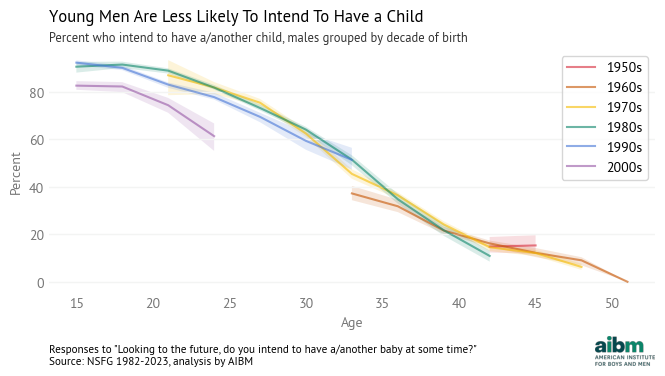

<IPython.core.display.Javascript object>

In [86]:
plot_table_with_errors(tables, cohorts, ages)
title = "Young Men Are Less Likely To Intend To Have a Child"
subtitle = (
    "Percent who intend to have a/another child, males grouped by decade of birth"
)
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you intend to have a/another baby at some time?"
Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Age", ylabel="Percent")
inset = add_logo()
savefig(6, inset)

In [87]:
age_groups = [15, 18, 21, 24]
summarize_age_groups(df2, "intent_yes", age_groups).dropna()

70     82.292223
80     86.952833
90     85.964881
100    79.644332
dtype: float64

<IPython.core.display.Javascript object>

### Additional expected births

In [88]:
tables = [make_table(resample_by_cycle(df2), "addexp") for i in range(101)]

<IPython.core.display.Javascript object>

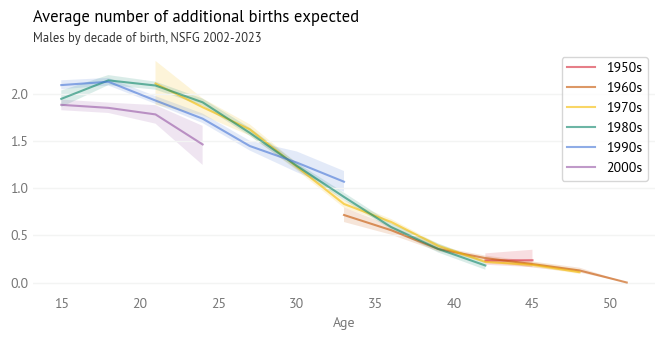

<IPython.core.display.Javascript object>

In [89]:
plot_table_with_errors(tables, cohorts, ages)
title = "Average number of additional births expected"
subtitle = "Males by decade of birth, NSFG 2002-2023 "
add_title(title, subtitle)

decorate(xlabel="Age")

### Number of children

`numbiokid`

"Altogether, how many biological children have you fathered?"

In [90]:
tables = [make_table(resample_by_cycle(df2), "numbiokid") for i in range(101)]

<IPython.core.display.Javascript object>

In [91]:
summary = summarize_age_group(tables, 33)
summary.round(1)

1950s    NaN
1960s    1.3
1970s    1.4
1980s    1.1
1990s    0.6
2000s    NaN
dtype: float64

<IPython.core.display.Javascript object>

In [92]:
summary = summarize_age_group(tables, 24)
summary.round(1)

1950s    NaN
1960s    NaN
1970s    0.4
1980s    0.4
1990s    0.2
2000s    0.1
dtype: float64

<IPython.core.display.Javascript object>

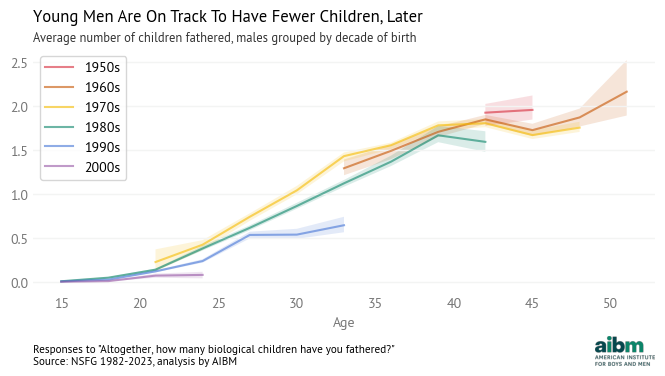

<IPython.core.display.Javascript object>

In [93]:
plot_table_with_errors(tables, cohorts, ages)
title = "Young Men Are On Track To Have Fewer Children, Later"
subtitle = "Average number of children fathered, males grouped by decade of birth"
add_title(title, subtitle)

subtext = """
Responses to "Altogether, how many biological children have you fathered?"
Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Age")
inset = add_logo()
savefig(4, inset)

In [94]:
# it looks like there is one respondent over 50 who generates a spurious point
subset = df2.query("ager < 50")
tables = [make_table(resample_by_cycle(subset), "child_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

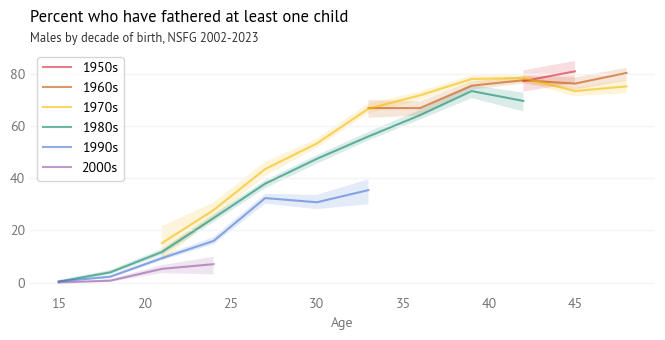

<IPython.core.display.Javascript object>

In [95]:
plot_table_with_errors(tables, cohorts, ages)
title = "Percent who have fathered at least one child"
subtitle = "Males by decade of birth, NSFG 2002-2023 "
add_title(title, subtitle)

decorate(xlabel="Age")

In [96]:
tables = [make_table(resample_by_cycle(df2), "strl_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

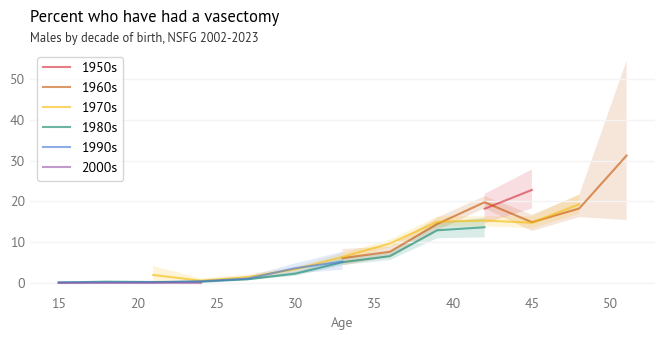

<IPython.core.display.Javascript object>

In [97]:
plot_table_with_errors(tables, cohorts, ages)
title = "Percent who have had a vasectomy"
subtitle = "Males by decade of birth, NSFG 2002-2023 "
add_title(title, subtitle)

decorate(xlabel="Age")

### Sterilizing operation

In [98]:
subset = df.query("cycle >= 10")
subset2 = df2.query("cycle >= 10")

<IPython.core.display.Javascript object>

In [99]:
def make_simple_table(df, var):
    """Group by age only, not cohort"""
    # subset = df.query("birth_index >= 60")
    table = df.groupby(["age_group"])[var].mean()
    return table

<IPython.core.display.Javascript object>

In [100]:
make_simple_table(subset, "strl_yes")

age_group
15.0    0.002039
18.0    0.001826
21.0    0.005848
24.0    0.027907
27.0    0.063113
30.0    0.092045
33.0    0.146163
36.0    0.214513
39.0    0.223638
42.0    0.305255
45.0    0.337369
48.0    0.443656
51.0    0.600000
Name: strl_yes, dtype: float64

<IPython.core.display.Javascript object>

In [101]:
tables = [
    make_simple_table(resample_by_cycle(subset), "strl_tubs") * 100 for i in range(101)
]

<IPython.core.display.Javascript object>

In [102]:
tables2 = [
    make_simple_table(resample_by_cycle(subset2), "strl_yes").drop(51) * 100
    for i in range(101)
]

<IPython.core.display.Javascript object>

In [103]:
def plot_simple_table_with_errors(tables, ages, color="C0", **options):
    frame = pd.DataFrame(columns=ages)
    for i, table in enumerate(tables):
        frame.loc[i] = table

    # using the 84% CI, so non-overlapping corresponds to
    # a difference that's significant at 5% level
    low, median, high = percentile_rows(frame, [8, 50, 92])
    plt.fill_between(ages, low, high, color=color, alpha=0.15)
    plt.plot(ages, median, color=color, **options)

<IPython.core.display.Javascript object>

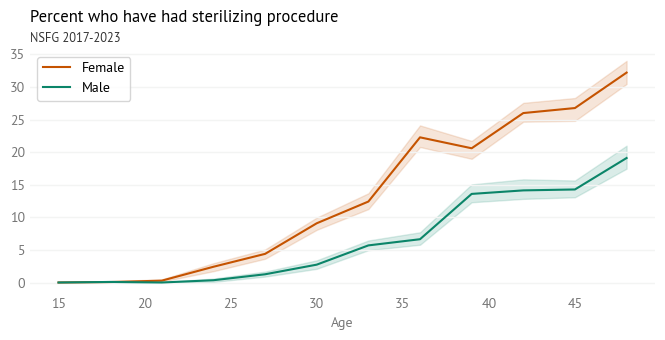

<IPython.core.display.Javascript object>

In [104]:
plot_simple_table_with_errors(tables, ages, color=aibm_orange, label="Female")
plot_simple_table_with_errors(tables2, ages, color=aibm_green, label="Male")

title = "Percent who have had sterilizing procedure"
subtitle = "NSFG 2017-2023 "
add_title(title, subtitle)

decorate(xlabel="Age")

## Differences

### Difference between want and intend for women

In [105]:
tables1 = [make_table(resample_by_cycle(df), "intent_yes") * 100 for i in range(101)]
tables2 = [make_table(resample_by_cycle(df), "want_yes") * 100 for i in range(101)]
diffs = [table2 - table1 for table1, table2 in zip(tables1, tables2)]

<IPython.core.display.Javascript object>

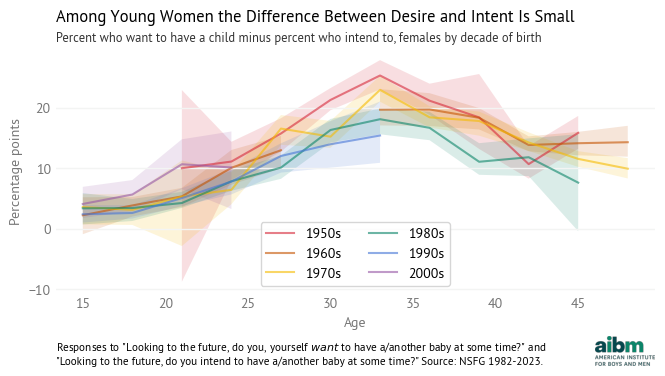

<IPython.core.display.Javascript object>

In [106]:
plot_table_with_errors(diffs, cohorts, ages)
title = "Among Young Women the Difference Between Desire and Intent Is Small"
subtitle = "Percent who want to have a child minus percent who intend to, females by decade of birth"
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you, yourself $want$ to have a/another baby at some time?" and
"Looking to the future, do you intend to have a/another baby at some time?" Source: NSFG 1982-2023."""
add_subtext(subtext)

plt.legend(ncol=2)
decorate(xlabel="Age", ylabel="Percentage points", legend=False)
inset = add_logo()
savefig(7, inset)

### Difference between want and intend for men

In [107]:
tables1 = [make_table(resample_by_cycle(df2), "intent_yes") * 100 for i in range(101)]
tables2 = [make_table(resample_by_cycle(df2), "want_yes") * 100 for i in range(101)]
diffs = [table2 - table1 for table1, table2 in zip(tables1, tables2)]

<IPython.core.display.Javascript object>

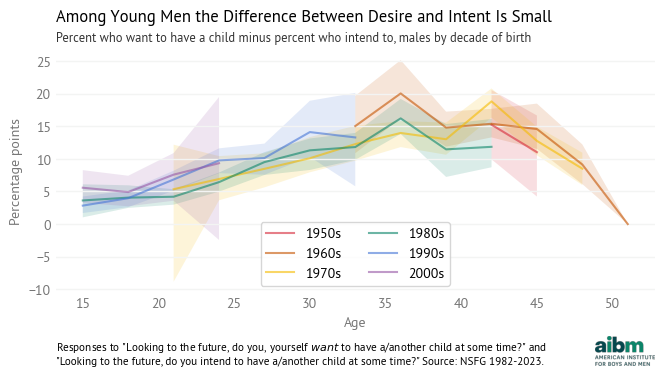

<IPython.core.display.Javascript object>

In [108]:
plot_table_with_errors(diffs, cohorts, ages)
title = "Among Young Men the Difference Between Desire and Intent Is Small"
subtitle = "Percent who want to have a child minus percent who intend to, males by decade of birth"
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you, yourself $want$ to have a/another child at some time?" and
"Looking to the future, do you intend to have a/another child at some time?" Source: NSFG 1982-2023."""
add_subtext(subtext)

plt.legend(ncol=2)
decorate(xlabel="Age", ylabel="Percentage points", legend=False)
inset = add_logo()
savefig(8, inset)

### Gender difference in desire for children

In [109]:
tables1 = [make_table(resample_by_cycle(df), "intent_yes") * 100 for i in range(101)]
tables2 = [make_table(resample_by_cycle(df2), "intent_yes") * 100 for i in range(101)]
diffs = [table2 - table1 for table1, table2 in zip(tables1, tables2)]

<IPython.core.display.Javascript object>

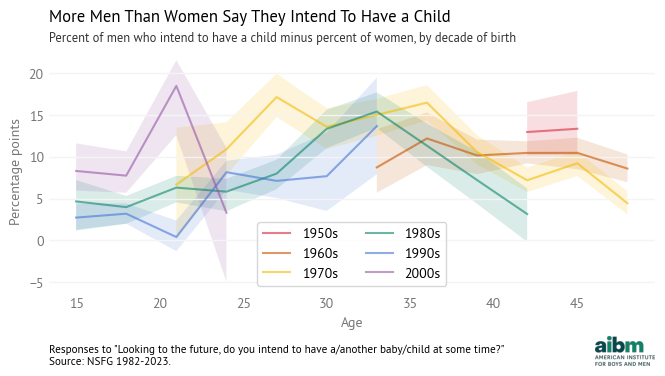

<IPython.core.display.Javascript object>

In [110]:
plot_table_with_errors(diffs, cohorts, ages)
title = "More Men Than Women Say They Intend To Have a Child"
subtitle = "Percent of men who intend to have a child minus percent of women, by decade of birth"
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you intend to have a/another baby/child at some time?" 
Source: NSFG 1982-2023."""
add_subtext(subtext)

plt.legend(ncol=2)
decorate(xlabel="Age", ylabel="Percentage points", legend=False)
inset = add_logo()
savefig(9, inset)

### Gender difference in desire for children

In [111]:
tables1 = [make_table(resample_by_cycle(df), "want_yes") * 100 for i in range(101)]
tables2 = [make_table(resample_by_cycle(df2), "want_yes") * 100 for i in range(101)]
diffs = [table2 - table1 for table1, table2 in zip(tables1, tables2)]

<IPython.core.display.Javascript object>

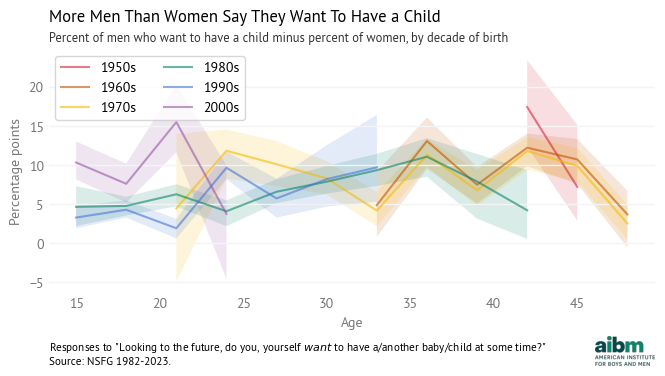

<IPython.core.display.Javascript object>

In [112]:
plot_table_with_errors(diffs, cohorts, ages)
title = "More Men Than Women Say They Want To Have a Child"
subtitle = (
    "Percent of men who want to have a child minus percent of women, by decade of birth"
)
add_title(title, subtitle)

subtext = """
Responses to "Looking to the future, do you, yourself $want$ to have a/another baby/child at some time?"
Source: NSFG 1982-2023."""
add_subtext(subtext)

plt.legend(ncol=2)
decorate(xlabel="Age", ylabel="Percentage points", legend=False)
inset = add_logo()
savefig(10, inset)

## Global fertility

In [113]:
import pandas as pd
import zipfile

# Define the zip file name
zip_filename = "period-total-fertility-rate.filtered.zip"

# Open the zip file and extract the CSV
with zipfile.ZipFile(zip_filename, "r") as z:
    # Get the list of files inside the zip
    file_list = z.namelist()

    # Assuming there's only one CSV file, extract its name
    csv_filename = [f for f in file_list if f.endswith(".csv")][0]

    # Read the CSV file into a DataFrame
    with z.open(csv_filename) as f:
        fertility_df = pd.read_csv(f)

fertility_df.columns

Index(['Entity', 'Code', 'Year', 'Period total fertility rate - Total'], dtype='object')

<IPython.core.display.Javascript object>

In [114]:
# Pivoting the DataFrame
df_pivot = fertility_df.pivot(
    index="Year", columns="Entity", values="Period total fertility rate - Total"
)[["United States", "Canada", "South Korea"]]
df_pivot.head()

Entity,United States,Canada,South Korea
Year,,,
1960,3.667,3.909,NaN
1961,3.626,3.853,NaN
1962,3.481,3.770,NaN
1963,3.354,3.680,NaN
1964,3.222,3.512,NaN


<IPython.core.display.Javascript object>

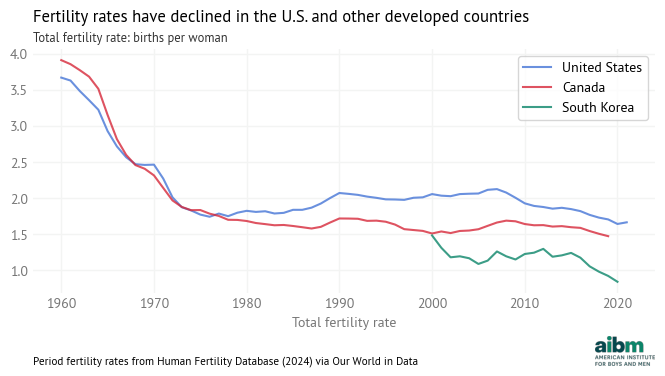

<IPython.core.display.Javascript object>

In [115]:
colors = [aibm_blue, crimson, aibm_green]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

df_pivot.plot(alpha=0.8)

title = "Fertility rates have declined in the U.S. and other developed countries"
subtitle = "Total fertility rate: births per woman"
add_title(title, subtitle)

subtext = """
Period fertility rates from Human Fertility Database (2024) via Our World in Data"""
add_subtext(subtext)

decorate(xlabel="Total fertility rate", ylabel="")
inset = add_logo()
savefig(11, inset)

In [116]:
df_pivot.loc[[2007, 2021], "United States"]

Year
2007    2.122
2021    1.662
Name: United States, dtype: float64

<IPython.core.display.Javascript object>